In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Scaling Package
from sklearn.preprocessing import MinMaxScaler

In [436]:
train = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-train.csv')
test = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-test.csv')


In [437]:
train = train.iloc[0:3]
test = test.iloc[0:3]

In [438]:
train = train.transpose()
test = test.transpose()

In [439]:
train = train.dropna()  
test = test.dropna()  


In [440]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [441]:
train

,index,0,1,2
0,V1,D1,D2,D3
1,V2,1017.1,2793.7,1091.3
2,V3,1019.3,2793.8,1088.5
3,V4,1017.0,2803.7,1085.7
4,V5,1019.2,2805.8,1082.9
...,...,...,...,...
126,V127,1023.4,2600.9,1134.7
127,V128,1019.6,2612.2,1131.9
128,V129,1016.7,2595.8,1129.1
129,V130,1012.0,2589.5,1126.3


In [442]:
header_row_train = train.iloc[0]
header_row_train

index    V1
0        D1
1        D2
2        D3
Name: 0, dtype: object

In [424]:
header_row_train = train.iloc[0]
header_row_test = test.iloc[0]
train = pd.DataFrame(train.values[1:], columns=header_row_train)
test = pd.DataFrame(test.values[1:], columns=header_row_test)
data = pd.concat([train, test], axis=0)
data = data.reset_index(drop=True)
data = data.drop(columns=['V1'])
data


,D1,D2
0,1017.1,2793.7
1,1019.3,2793.8
2,1017.0,2803.7
3,1019.2,2805.8
4,1018.7,2802.3
...,...,...
1015,2066.4,2989.0
1016,2067.4,2991.4
1017,2071.4,3024.9
1018,2083.8,3070.8


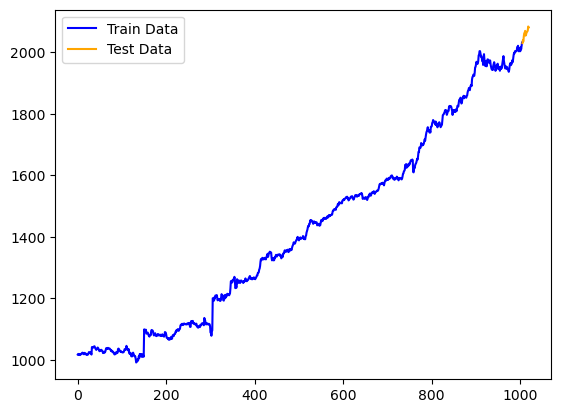

In [425]:
plt.plot(data['D1'][0:1005], color='blue', label='Train Data')
plt.plot(data['D1'][1005:], color='orange', label='Test Data')
plt.legend()
plt.show()

In [426]:
x = data.values
x

array([[1017.1, 2793.7],
       [1019.3, 2793.8],
       [1017.0, 2803.7],
       ...,
       [2071.4, 3024.9],
       [2083.8, 3070.8],
       [2080.6, 3076.9]], dtype=object)

In [427]:
column_names = data.columns
x = data.values
# # Let's scale the data -- this helps avoid the exploding gradient issue
scale = MinMaxScaler(feature_range=(0,1)) # This is by default.
scale.fit(x[:988])
x_scaled = scale.transform(x)
df = pd.DataFrame(x_scaled)


In [415]:
npa = df
npa.columns = column_names
npa

,D1,D2
0,0.025294,0.228291
1,0.027468,0.228385
2,0.025195,0.237740
3,0.027369,0.239724
4,0.026875,0.236417
...,...,...
1015,1.062049,0.412832
1016,1.063037,0.415100
1017,1.066989,0.446754
1018,1.079241,0.490126


In [431]:
npa.shape[0]

1020

In [434]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 15  # Number of samples (in past)
steps = 1  # Number of steps (in future)
X = []  # X array
Y = []  # Y array

for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples,0:2].values)  # Independent Samples
    Y.append(npa[i+samples][0])  # Dependent Samples

print('Training Data: Length is', len(X[0]), ':', X[0])
print('Testing Data:',Y[0])

InvalidIndexError: (slice(0, 15, None), slice(0, 2, None))

In [375]:
# Flatten this matrix down.
npa = returns.values[:].reshape(-1,1) # Python is smart to recognize whatever dimension you need by using this parameter
print(len(npa))
# # Let's scale the data -- this helps avoid the exploding gradient issue
scale = MinMaxScaler(feature_range=(0,1)) # This is by default.
npa = scale.fit_transform(npa)
print(len(npa))

2040
2040


In [376]:
npa

array([[       nan],
       [       nan],
       [0.24059929],
       ...,
       [0.36897767],
       [0.22473561],
       [0.2520564 ]])

In [192]:
npa[0] = 0

In [193]:
train_npa = npa[0:len(train)-1]
len(train_npa)

1005

In [194]:
test_npa = npa[len(train)-1:len(data)+1]
len(test_npa)

15

In [195]:
npa.shape[0]

1020

In [196]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 15  # Number of samples (in past)
steps = 1  # Number of steps (in future)
X = []  # X array
Y = []  # Y array

for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples])  # Independent Samples
    Y.append(npa[i+samples][0])  # Dependent Samples

print('Training Data: Length is', len(X[0]), ':', X[0])
print('Testing Data:',Y[0])


Training Data: Length is 15 : [[0.        ]
 [0.28661528]
 [0.25508059]
 [0.28661528]
 [0.26769446]
 [0.24947442]
 [0.29152067]
 [0.26979678]
 [0.27189909]
 [0.29292221]
 [0.28170988]
 [0.27330063]
 [0.25157673]
 [0.27750526]
 [0.24807288]]
Testing Data: 0.3027330063069379


In [197]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (1005, 15, 1) Dimensions of Y (1005,)


In [198]:
threshold = npa[989:1004]
print('Threshold is', threshold)

Threshold is [[0.25437982]
 [0.28241065]
 [0.28100911]
 [0.27259986]
 [0.35599159]
 [0.27189909]
 [0.30343378]
 [0.18079888]
 [0.23405746]
 [0.33917309]
 [0.27960757]
 [0.19831815]
 [0.35669236]
 [0.22985284]
 [0.3580939 ]]


In [276]:
from tensorflow.keras.optimizers.experimental import SGD
# Create the model
model = Sequential()
model.add(LSTM(32,use_bias=True, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(32))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

# Print out architecture.
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 15, 32)            4352      
                                                                 
 lstm_41 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [277]:
# Fitting the data
history = model.fit(X,
                    Y,
                    shuffle = False, # Since this is time series data
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/100
26/26 [==============================] - 3s 30ms/step - loss: 0.0258 - val_loss: 0.0032
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 5/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 6/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 8/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 9/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 10/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 

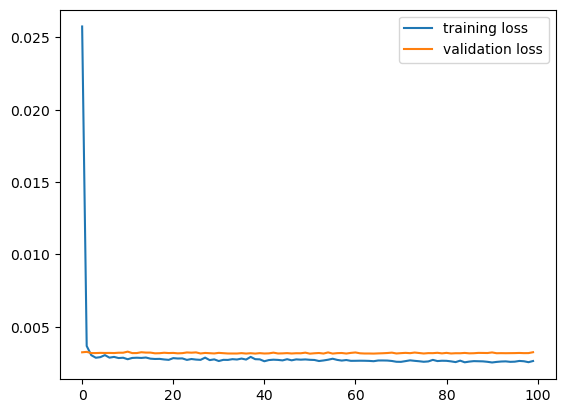

In [278]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

In [279]:
true_Y = npa[1005:1020]
pred_Y = []
print('Number of Forecasts to do: ',len(true_Y))

Number of Forecasts to do:  15


In [280]:
for i in range(1005,1020):
    p = model.predict(threshold.reshape(1,X.shape[1],1))[0,0]
    threshold = np.roll(threshold, -1)  # Shift elements to the left
    threshold[-1] = p  # Set the last element as the prediction
    pred_Y.append(p)
    print(p)

1/1 [==============================] - 1s 523ms/step
0.2722786
1/1 [==============================] - 0s 16ms/step
0.27231452
1/1 [==============================] - 0s 15ms/step
0.27236027
1/1 [==============================] - 0s 15ms/step
0.27240503
1/1 [==============================] - 0s 15ms/step
0.27244365
1/1 [==============================] - 0s 15ms/step
0.27247417
1/1 [==============================] - 0s 14ms/step
0.27249658
1/1 [==============================] - 0s 15ms/step
0.27251175
1/1 [==============================] - 0s 15ms/step
0.27252102
1/1 [==============================] - 0s 15ms/step
0.27252573
1/1 [==============================] - 0s 15ms/step
0.272527
1/1 [==============================] - 0s 14ms/step
0.27252603
1/1 [==============================] - 0s 30ms/step
0.27252355
1/1 [==============================] - 0s 14ms/step
0.27252024
1/1 [==============================] - 0s 14ms/step
0.2725166


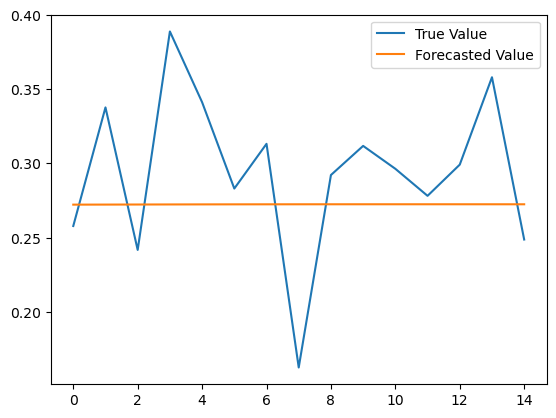

In [281]:
plt.plot(true_Y, label = 'True Value')
plt.plot(pred_Y, label = 'Forecasted Value')
plt.legend()
# Model just copied the same value over and over again. Hence, model is not very robust.
# It's just predicting the mean.

In [282]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate mean squared error (MSE)
mse = mean_squared_error(true_Y, pred_Y)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(true_Y, pred_Y)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.003249277879347873
Mean Absolute Error (MAE): 0.04544919906055752
